# Task 2: IMDb Movies India
     Author: Soumen Das
     Batch: DECEMBER BATCH A95
     Domain: Data Science
     Aim: We need to Build a model that predicts the rating of a movie

## Import Important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Movie Dataset

In [2]:
df = pd.read_csv("IMDb Movies India.csv", encoding='latin1')

In [3]:
df.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [4]:
df.shape

(15509, 10)

In [5]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [6]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

## Drop the Missing Value

In [7]:
df.dropna(inplace = True)

In [8]:
df.isna().sum()

Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [9]:
df.shape

(5659, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [11]:
df.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

# Data Pre-Processing
- Data have to be processed to make more easier to derive insights from it and pre-processed will be more suitable while fitting the data into an algorithm
- In this project we have processed the data by column wise based on the requirement

In [12]:
# Replacing the brackets from year column
df['Year'] = df['Year'].str.replace(r'[()]', '', regex=True).astype(int)

In [13]:
# Remove the min word from 'Duration' column and convert all values to numeric
df['Duration'] = pd.to_numeric(df['Duration'].str.replace(' min',''))

In [14]:
# Splitting the genre by, to keep only unique genres and replacing the null values with mode
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre')
df['Genre'].fillna(df['Genre'].mode()[0], inplace=True)

C:\Users\SOUMEN\AppData\Local\Temp\ipykernel_13032\2086522394.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Genre'].fillna(df['Genre'].mode()[0], inplace=True)


In [15]:
# Convert 'Votes' to numeric and replace the , to keep only numerical part
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''))

In [16]:
# Checking the dataset is there any null values present and data types of the features present
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11979 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      11979 non-null  object 
 1   Year      11979 non-null  int64  
 2   Duration  11979 non-null  int64  
 3   Genre     11979 non-null  object 
 4   Rating    11979 non-null  float64
 5   Votes     11979 non-null  int64  
 6   Director  11979 non-null  object 
 7   Actor 1   11979 non-null  object 
 8   Actor 2   11979 non-null  object 
 9   Actor 3   11979 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 1.0+ MB


## Data Visualizing

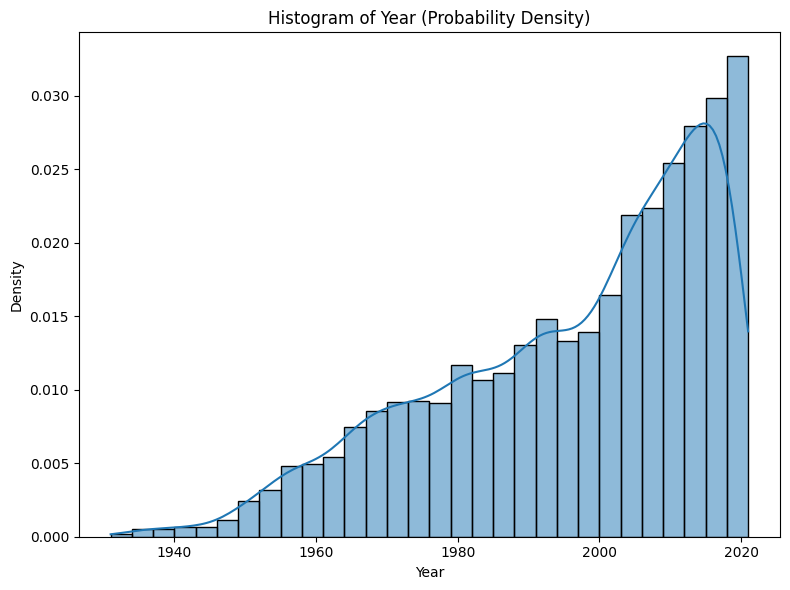

In [17]:
# Visualization part is done to show the relationships between the feature present in the dataset
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Year', stat='density', bins=30, kde=True)  # Use 'density' for probability density
plt.title("Histogram of Year (Probability Density)")
plt.xlabel("Year")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

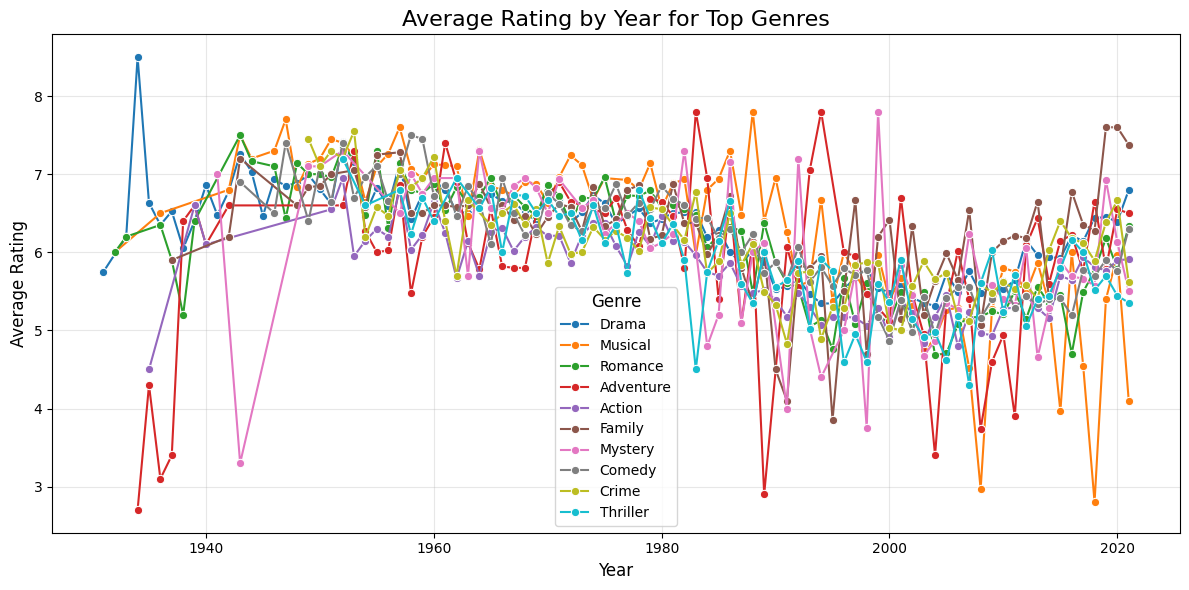

In [18]:
# Group data by year and genre, then calculate the average rating
avg_rating_by_year = df.groupby(['Year', 'Genre'])['Rating'].mean().reset_index()

# Get the top 10 genres
top_genres = df['Genre'].value_counts().head(10).index

# Filter data to include only the top genres
average_rating_by_year = avg_rating_by_year[avg_rating_by_year['Genre'].isin(top_genres)]

# Create the plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=average_rating_by_year,x='Year',y='Rating',hue='Genre',marker='o')

# Customize the plot
plt.title('Average Rating by Year for Top Genres', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.legend(title='Genre', fontsize=10, title_fontsize=12)
plt.grid(alpha=0.3)

# Show the plot
plt.tight_layout()
plt.show()

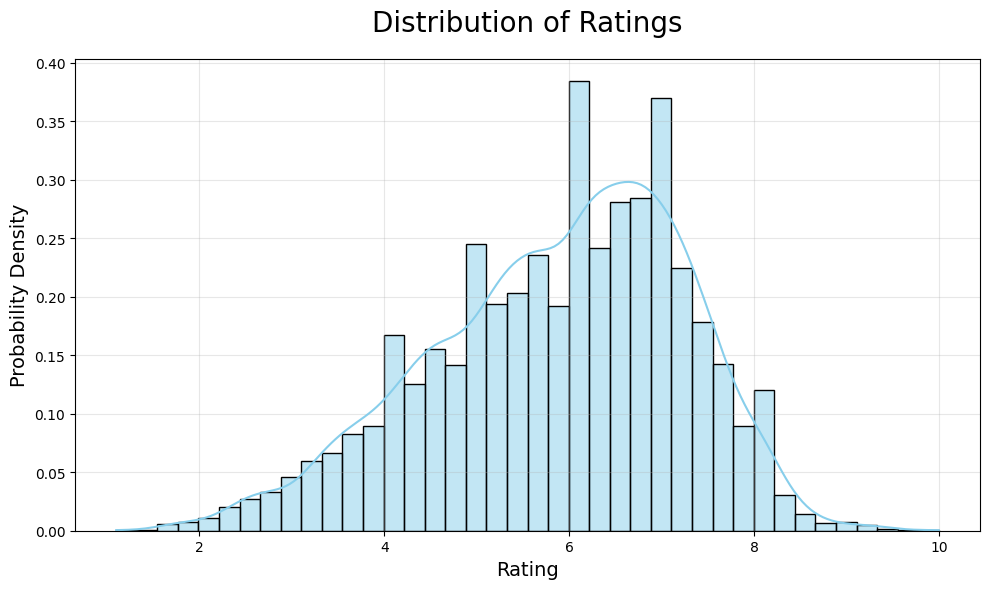

In [19]:
# Plotting the histogram with density normalization
plt.figure(figsize=(10, 6))
sns.histplot(
    df['Rating'], 
    kde=True, 
    bins=40, 
    stat='density', 
    color='skyblue',
    edgecolor='black'
)

# Adding plot details
plt.title("Distribution of Ratings", fontsize=20, pad=20)
plt.xlabel("Rating", fontsize=14)
plt.ylabel("Probability Density", fontsize=14)
plt.grid(alpha=0.3)

# Display the plot
plt.tight_layout()
plt.show()

## Feature Engineering

In [20]:
# Importing essential libraries for model building

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_sco

ImportError: cannot import name 'r2_sco' from 'sklearn.metrics' (C:\Users\SOUMEN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\__init__.py)

In [21]:
# Dropping Name column because it doesn't impact the outcome
df.drop('Name', axis=1, inplace = True)

In [22]:
df.columns

Index(['Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director', 'Actor 1',
       'Actor 2', 'Actor 3'],
      dtype='object')

In [24]:
genre_mean_rating = df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = df.groupby('Director')['Rating'].transform('mean')
df['Director_encoded'] = director_mean_rating

actor1_mean_rating = df.groupby('Actor 1')['Rating'].transform('mean')
df['Actor1_encoded'] = actor1_mean_rating

# Corrected the typo here
actor2_mean_rating = df.groupby('Actor 2')['Rating'].transform('mean')
df['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = df.groupby('Actor 3')['Rating'].transform('mean')
df['Actor3_encoded'] = actor3_mean_rating

In [25]:
# Keeping the predictor and target variables

x = df[['Year', 'Votes', 'Duration', 'Genre_mean_rating', 'Director_encoded','Actor1_encoded','Actor2_encoded','Actor3_encoded']]
y = df['Rating']

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Model Building

In [27]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.linear_model import LinearRegression

# Initialize the model
Model = LinearRegression()

# Train the model on training data
Model.fit(x_train, y_train)

# Make predictions on the test data
Model_pred = Model.predict(x_test)

# Check predictions
print(Model_pred)

[3.94886873 6.00222825 7.0063588  ... 5.99468308 4.66740644 6.51074661]


In [29]:
# Evaluating the performance of model with evaluation metrics

print('The performance evaluation of Logistic Regression is below: ', '\n')
print('Mean squared error: ',mean_squared_error(y_test, Model_pred))
print('Mean absolute error: ',mean_absolute_error(y_test, Model_pred))
print('R2 score:', r2_score(y_test, Model_pred))

The performance evaluation of Logistic Regression is below:  

Mean squared error:  0.4465441653985704
Mean absolute error:  0.4921902540765641


NameError: name 'r2_score' is not defined

In [30]:
x.head(5)

,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019,8,109,6.056744,7.000000,6.850000,7.00,7.00
3,2019,35,110,5.751042,4.400000,5.250000,4.40,4.46
3,2019,35,110,5.811087,4.400000,5.250000,4.40,4.46
5,1997,827,147,5.751042,5.335135,4.793617,5.73,5.93
5,1997,827,147,6.056744,5.335135,4.793617,5.73,5.93


In [31]:
y.head(5)

1    7.0
3    4.4
3    4.4
5    4.7
5    4.7
Name: Rating, dtype: float64

In [ ]:
# For testing, we create a new dataframe with values close to the any of our existing data to evaluate.
data = {'Year':[2019], 'Votes': [36], 'Duration': [111], 'Genre_mean_rating': [5.8], 'Director_encoded': [4.5], 'Actor1_encoded':[5.3],'Actor2_encoded':[4.5], 'Actor3_encoded':[4.5]}
trail = pd.DataFrame(data)